<a href="https://colab.research.google.com/github/Tizzy1999/ml2019/blob/master/pandas_tutorial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline

## **Dataset 1: Standford Open Policing Project**


In [0]:
ri = pd.read_csv('/content/gdrive/My Drive/201911ML/police.txt')

In [0]:
ri.head()
# NaN: not a number, missing value in pandas
# what's the point of NaN?
# you want to distinguish missing data from real data
# I think missing data shoundn't be included in the data analysis most of the time

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [0]:
ri.shape

(91741, 15)

In [0]:
ri.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [0]:
ri.isnull().sum()
# the count of missing data in each of the column
# there're two steps in this process
# first ri.isnull() you can all the boolean values in each cell
# then since Flase == 0 and True == 1
# you just need to sum the whole column
# then you can get the count of missing value in each column

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

## **1.Remove the column that only contains missing values**


In [0]:
ri.drop('county_name',axis='columns',inplace=True)
# ri.dropna(axis='columns', how='all)

##**2.Do man or woman speed more often?**

* driver_gender
* violation

In [0]:
 ri[ri.violation == 'Speeding'].driver_gender.value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [0]:
ri[ri.driver_gender == 'M'].violation.value_counts(normalize=True)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

In [0]:
ri[ri.driver_gender == 'F'].violation.value_counts(normalize=True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

In [0]:
ri.groupby('driver_gender').violation.value_counts(normalize=True)

driver_gender  violation          
F              Speeding               0.658500
               Moving violation       0.136277
               Equipment              0.105780
               Registration/plates    0.043086
               Other                  0.029348
               Seat belt              0.027009
M              Speeding               0.524350
               Moving violation       0.207012
               Equipment              0.135671
               Other                  0.057668
               Registration/plates    0.038461
               Seat belt              0.036839
Name: violation, dtype: float64

In [0]:
ri.groupby('driver_gender').violation.value_counts(normalize=True).loc[:,'Speeding']

driver_gender
F    0.65850
M    0.52435
Name: violation, dtype: float64

##**3. Does gender affect who gets searched during a stop?**
* driver_gender
* search_conducted

In [0]:
ri.search_conducted.value_counts(normalize=True)

False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

In [0]:
# neat trick: this actually gives you the percentage of True(=1) for the column
# which is the percentage of the search conducted 
ri.search_conducted.mean()

0.03483720473942948

In [0]:
# groupby: for each gender
ri.groupby('driver_gender').search_conducted.mean()
# it depends on for what reasons they are pulled over
# hypothetically, 
# when people are pulled over for seatbelt violation
# they are rarely searched
# when they are pulled over for registration violations
# they are often searched
# so, it could be that search rate is tied to violation
# and man commit more registration violations 
# and woman commit more seatbelt violations
# in this case, gender is actually irrelevant to why there's a difference

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

In [0]:
ri.groupby(['violation','driver_gender']).search_conducted.mean()
# male actually gets a higher search rate for every violation

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

## **4. Why's search type missing so often?**

In [0]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [0]:
ri.search_conducted.value_counts()
# so, because it depends on how many search is conducted

False    88545
True      3196
Name: search_conducted, dtype: int64

In [0]:
ri[ri.search_conducted == False].search_type.value_counts()
# you get an empty series, since there's no search type 
# for a search that's never conducted in the first place
# the search type is always NaN, so there's no values to count
# since the value_counts() method actually drops null values

Series([], Name: search_type, dtype: int64)

In [0]:
# disable value_counts() method to drop null values
ri[ri.search_conducted == False].search_type.value_counts(dropna = False)

NaN    88545
Name: search_type, dtype: int64

In [0]:
ri.search_type.value_counts(dropna=False)

NaN                                                         88545
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Probable Cause,Protective Frisk                                33
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Incident to Arrest,Inventory,Protective Frisk                  11
Inventory,

In [0]:
ri.search_type.value_counts()

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Probable Cause,Protective Frisk                               33
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Incident to Arrest,Inventory,Protective Frisk                 11
Inventory,Protective Frisk                                    11
Protective Frisk,Reasonab

## **5. During a search, how often is the driver frisked?**

In [0]:
# add anothee frisk column
 ri['frisk'] = ri.search_type.str.contains('Protective Frisk')

In [0]:
# by default: pandas calculations ignore missing values
ri.frisk.value_counts(dropna=False)

NaN      88545
False     2922
True       274
Name: frisk, dtype: int64

In [0]:
# the sum of the true values
ri.frisk.sum()

274

In [0]:
# during a search, how often are they frisk
ri.frisk.mean()

0.08573216520650813

##**6. Which year has the least number of stops?**

In [0]:
ri.stop_date.str.slice(0,4).value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

In [0]:
# combine dates and times column
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
combined.head()

0    2005-01-02 01:55
1    2005-01-18 08:15
2    2005-01-23 23:15
3    2005-02-20 17:15
4    2005-03-14 10:00
Name: stop_date, dtype: object

In [0]:
# take the series and converts it into a date-time datatype
# store it in a new column
ri['stop_datetime'] = pd.to_datetime(combined)

In [0]:
ri['stop_datetime'].head()
# you can see the data type changed to datetime

0   2005-01-02 01:55:00
1   2005-01-18 08:15:00
2   2005-01-23 23:15:00
3   2005-02-20 17:15:00
4   2005-03-14 10:00:00
Name: stop_datetime, dtype: datetime64[ns]

In [0]:
# working around with datetime data type
print(ri.stop_datetime.dt.year)
print(ri.stop_datetime.dt.month)
print(ri.stop_datetime.dt.time)

0        2005
1        2005
2        2005
3        2005
4        2005
         ... 
91736    2015
91737    2015
91738    2015
91739    2015
91740    2015
Name: stop_datetime, Length: 91741, dtype: int64
0         1
1         1
2         1
3         2
4         3
         ..
91736    12
91737    12
91738    12
91739    12
91740    12
Name: stop_datetime, Length: 91741, dtype: int64
0        01:55:00
1        08:15:00
2        23:15:00
3        17:15:00
4        10:00:00
           ...   
91736    20:27:00
91737    20:35:00
91738    20:45:00
91739    21:42:00
91740    22:46:00
Name: stop_datetime, Length: 91741, dtype: object


In [0]:
ri.stop_datetime.dt.year.value_counts().sort_values()

2005     2558
2010     7561
2009     7908
2013     7924
2011     8126
2015     8599
2008     8752
2014     9228
2007     9476
2006    10639
2012    10970
Name: stop_datetime, dtype: int64

In [0]:
# just the minimum value
ri.stop_datetime.dt.year.value_counts().sort_values().index[0]

2005

## **7. How does drug activity change by time of day?**
* stop_datetime
* drugs_related_stop



In [0]:
ri.drugs_related_stop.mean()

0.008883705213590434

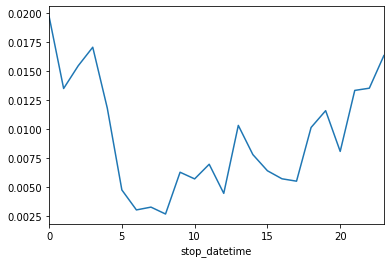

In [0]:
# for each hour, what's the rate of drugs related stop?
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean().plot()

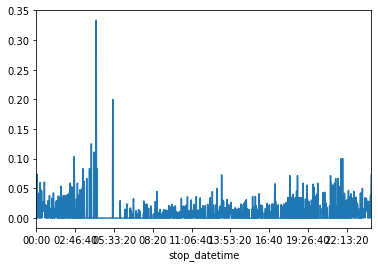

In [0]:
ri.groupby(ri.stop_datetime.dt.time).drugs_related_stop.mean().plot()

##**8. Do most stops occur at night?**

In [0]:
ri.stop_datetime.dt.hour.value_counts().sort_values()

5      210
4      254
3     1172
21    1499
18    2168
19    2587
17    2900
2     2975
6     3290
20    3340
22    3473
12    3582
16    3844
1     4442
7     4572
15    4832
13    4842
8     5210
0     5221
23    5629
14    5634
11    5877
9     6838
10    7350
Name: stop_datetime, dtype: int64

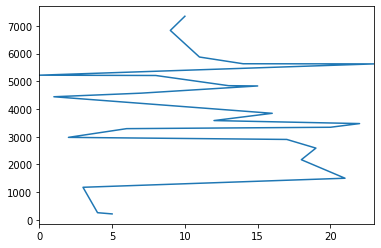

In [0]:
ri.stop_datetime.dt.hour.value_counts().plot()

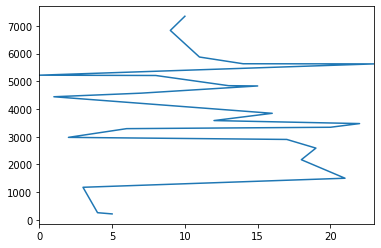

In [0]:
ri.stop_datetime.dt.hour.value_counts().sort_values().plot()

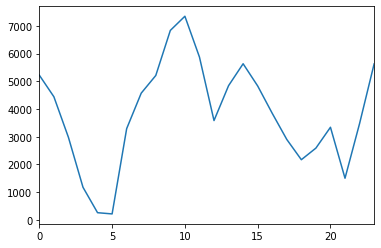

In [0]:
ri.stop_datetime.dt.hour.value_counts().sort_index().plot()
# as you can see that most plot occurs during the day

In [0]:
# suppose the datetime is between 10pm to 4am
ri[(ri.stop_datetime.dt.hour > 4) & (ri.stop_datetime.dt.hour < 22)].shape

(68575, 16)

In [0]:
ri.shape

(91741, 16)

##**9. Find the bad data in the stop_duration column and fix it**

In [0]:
ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

In [0]:
 ri.stop_duration.dtype

dtype('O')

In [0]:
# first you select the row, then you select the column 
ri.loc[(ri.stop_duration=='1')|(ri.stop_duration=='2'), 
       'stop_duration'] = 'NaN' 

In [0]:
# the problem is that the NaN(missing value) is not a string in Pandas 
ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
NaN              2
Name: stop_duration, dtype: int64

In [0]:
import numpy as np

In [0]:
# now we use numpy to replace the string NaN to real nan
ri.loc[ri.stop_duration == 'NaN', 'stop_duration'] = np.nan

In [0]:
ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64